In [1]:
!pip install tf_explain

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [4]:
# XAI알고리즘을 불러오는 부분입니다.
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [5]:
# XAI알고리즘을 불러오는 부분입니다.
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

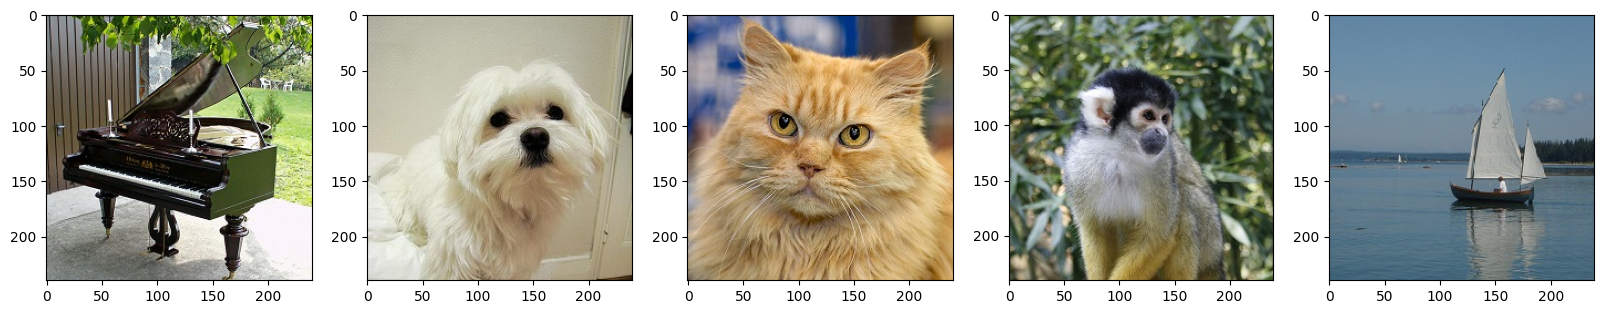

In [6]:
# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

# 주피터 노트북 상에서 보여질 이미지의 크기 
plt.figure(figsize=(20,20))

# 원본 이미지를 주피터 노트북에서 보이게 하기
for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_o)

In [7]:
images_originals

[array([[[131, 133, 145],
         [125, 128, 137],
         [ 70,  69,  74],
         ...,
         [183, 225,  55],
         [ 45,  64,   0],
         [ 74,  83,  28]],
 
        [[135, 137, 149],
         [132, 135, 144],
         [ 98,  99, 103],
         ...,
         [188, 233,  78],
         [ 54,  79,   0],
         [ 64,  78,  17]],
 
        [[136, 139, 148],
         [131, 134, 141],
         [111, 112, 116],
         ...,
         [157, 209,  83],
         [ 44,  77,   0],
         [ 55,  79,   5]],
 
        ...,
 
        [[143, 147, 146],
         [136, 140, 139],
         [129, 135, 133],
         ...,
         [248, 244, 245],
         [251, 247, 248],
         [251, 247, 248]],
 
        [[129, 133, 134],
         [131, 135, 136],
         [133, 139, 139],
         ...,
         [251, 246, 250],
         [250, 245, 249],
         [252, 247, 251]],
 
        [[139, 143, 144],
         [141, 145, 146],
         [138, 144, 144],
         ...,
         [249, 244, 248],
  

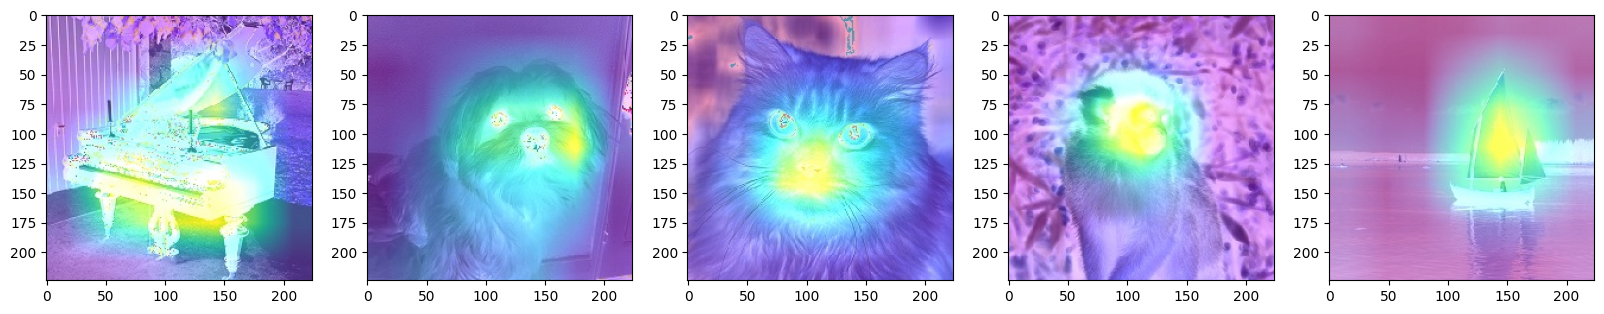

In [8]:
# 사전에 학습된 딥러닝 모델 불러오기
model = VGG16(weights="imagenet", include_top=True)

# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

# 그레이디언트 CAM 알고리즘 선택
explainer = GradCAM()

# 그레이디언트 CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_cams = []

# 그레이디언트 CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):  
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224)) # 이미지를 불러오고 내부에서 처리될 이미지의 크기를 설정합니다. 
    img = img_to_array(img) # 이미지를 넘파이 배열로 바꾸어 줍니다.
    data = ([img], None)
    grid = explainer.explain(data, model, int(i))                 # 그레이디언트 CAM이 실행되는 부분입니다. 
    explainer.save(grid, ".", './data/img/{}_cam.jpg'.format(l)) # 실행 후 저장되는 이름입니다.

# 그레이디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

In [9]:
images_cams

[array([[[159, 117, 191],
         [160, 120, 193],
         [205, 165, 236],
         ...,
         [126,  59, 217],
         [208, 153, 220],
         [207, 160, 180]],
 
        [[157, 115, 189],
         [157, 117, 190],
         [183, 143, 214],
         ...,
         [127,  57, 189],
         [202, 144, 203],
         [216, 167, 188]],
 
        [[155, 113, 187],
         [157, 117, 190],
         [173, 133, 204],
         ...,
         [150,  79, 157],
         [203, 142, 184],
         [224, 169, 192]],
 
        ...,
 
        [[149, 102, 183],
         [155, 108, 189],
         [161, 112, 194],
         ...,
         [ 79,  50, 130],
         [ 75,  46, 126],
         [ 75,  46, 126]],
 
        [[160, 113, 194],
         [164, 117, 198],
         [153, 104, 186],
         ...,
         [ 76,  47, 127],
         [ 76,  48, 125],
         [ 76,  48, 125]],
 
        [[155, 108, 189],
         [150, 103, 184],
         [154, 105, 187],
         ...,
         [ 77,  48, 128],
  

In [11]:
!pip install PyQt5

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------------ --------------------------- 2.1/6.9 MB 11.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.4/6.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
   --- ------------------------------------ 4.2/50.1 MB 126.8 MB/s eta 0:00:01
   ---- ----------------------------------- 5.2/50.1 MB 13.9 MB/s eta 0:00:04
   ------ --------------------------------- 8.4/50.1 MB 13.3 MB/s eta 0:00:04
   ----------- ---------------------------- 14.9/50.1 MB 18.4 MB/s eta 0:00:02
   ---------------- ----------------------- 21.0/50.1 MB 20.1 MB/s eta 0:00:02
   -------------------- ------------------- 25.2/50.1 MB 23.1 MB/s eta 0:00:02
   -------------------- ------------------- 25.2/50.1 MB 23.1 MB/s eta 0:00:02
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) 
    explainer.save(grid, ".", './data/img/{}_occ2.jpg'.format(l))

for img_path in glob.glob('./data/img/*_occ2.jpg'):
    images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

ValueError: No such layer: 20. Existing layers are: ['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions'].